# 선형모델의 학습 원리
선형모델은 최적의 가중치(w)와 절편(b)를 선택하기 위해 MSE(평균제곱오차)를 이용해 각 가설의 적합성을 판단한다.   
최적의 가중치(w)와 절편 (b)를 만들기 위해서 2가지 방식을 활용한다.
- 해석적 방법(Ordinary Least Squares) -> LinearRegression Class로 구현됨    전통적 방식
- 경사 하강법(Gradient Descent Algorithm) -> SGDRegresso Class로 구현됨     오늘날 방식
    - 초기 가중치로부터 기울기 값을 조금씩 수정해서 찾아가는 방식
    - 기울기가 낮아지는 방향으로 계속 업데이트하는 공식

## 선형모델의 장점
- 결과예측(추론) 속도가 빠르다.
- 대용량 데이터에도 충분히 활용 가능하다.
- 특성이 많은 데이터 세트라면 훌륭한 성능을 낼 수 있다.

## 해석적 방법을 활용한 고전적 선형모델의 단점
- 특성이 적은 저차원 데이터에서는 다른 모델의 일반화 성능이 더 좋을 수 있다. -> 특성확장을 하기도 한다.
- LinearRegression Model은 복잡도를 제어할 방법이 없어 과대적합 되기 쉽다. -> 모델 정규화를 통해 과대적합을 제어한다.

# (실습1) LinearRegression로 보스턴 집값 예측 - 회귀


## 1. 문제정의
- 보스턴 집값 데이터를 이용해서 집값을 예측하는 회귀 모델을 만들자

## 2. 데이터 수집

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
data = load_boston()

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

## 3. 데이터 분석

In [5]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 4. 모델학습

In [7]:
X = data.data
y = data.target

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=722)

In [9]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [10]:
X_test.shape, y_test.shape

((102, 13), (102,))

In [12]:
# 선형모델
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
# 학습된 가중치와 절편 확인
print("가중치 :",model.coef_)
print("절편 :",model.intercept_)

가중치 : [-1.18313515e-01  5.20521053e-02  1.76355388e-02  4.11554414e+00
 -2.01952839e+01  2.93408084e+00  1.01479948e-02 -1.56497280e+00
  3.16556945e-01 -1.25687293e-02 -1.01868234e+00  6.75071633e-03
 -5.73138231e-01]
절편 : 45.724826962953


In [14]:
# 모델평가
model.score(X_test,y_test)

0.745453655743962

In [16]:
# 다른 평가지표 사용
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE

pre = model.predict(X_test) # 예측값 생성
print("MAE :", mean_absolute_error(y_test,pre))
print("MSE :", mean_squared_error(y_test,pre))

MAE : 3.0285684574480047
MSE : 17.925235768942013


- 평균 제곱 오차 공식
    - 오차의 제곱을 평균내주는 것
    - 그 오차가 가장 적은 것이 가장 이상적인 함수

# 다항회귀
- y = (w1x1) + (w2x2) + (w3x3) ... +b
- 다항회귀 : y = (w1x1) + (w2x2^2) + (w2x2^3) ... + b (항의 차수가 높은 것도 포함
- 선형 모델의 수식에서 입력특성에 2차이상의 항이 포함된 경우
- 고차항이 포함되면 데이터의 특성을 더 fit하게 맞출 수 있어 성능 개선의 여지가 있다.
- 데이터에 너무 딱 맞게 가기 때문에 과대적합이 발생할 수 있다.

In [31]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, boston.target, random_state=726)

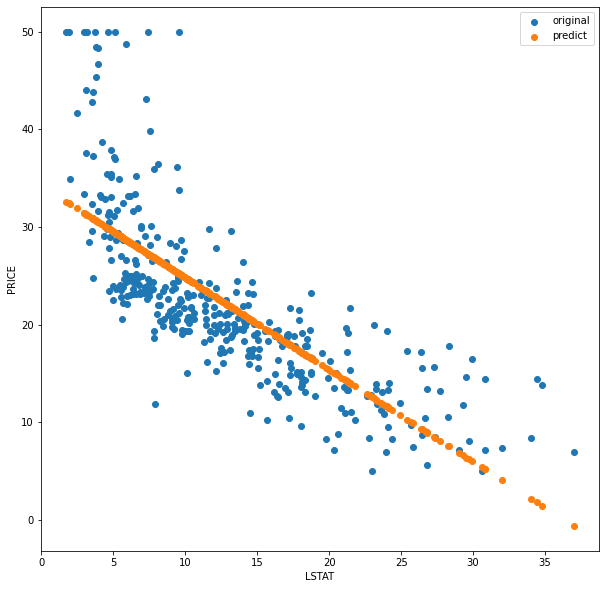

In [33]:
plt.figure(figsize=(10, 10)) #가로, 세로 크기 설정
plt.scatter(X_train['LSTAT'], y_train, label='original')

# 선형모델 학습
LSTAT_model = LinearRegression()
LSTAT_model.fit(X_train[['LSTAT']], y_train)
# 선형모델의 예측결과 확인
pre = LSTAT_model.predict(X_train[['LSTAT']])
plt.scatter(X_train[['LSTAT']], pre, label='predict')

plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()

#### 다항회귀 구현하기
1. 특성확장을 통해서 다항식을 만들어준다.
2. sklearn의 PolynomialFeatures를 이용한다.

In [34]:
# 특성 확장
X_train['LSTAT x LSTAT' ] = X_train['LSTAT']**2  #서로 다른 특성끼리 곱해서 다항회귀를 유도하기도 한다

In [35]:
# 모델학습
LSTAT_model2 = LinearRegression()
LSTAT_model2.fit(X_train[["LSTAT", 'LSTAT x LSTAT']], y_train)
# 모델예측
pre2 = LSTAT_model2.predict(X_train[["LSTAT", 'LSTAT x LSTAT']])

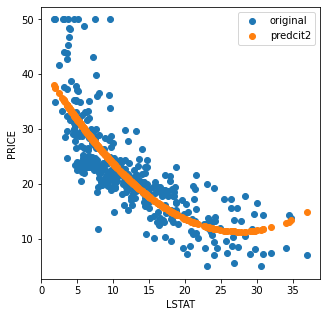

In [36]:
plt.figure(figsize=(5,5))
plt.scatter(X_train['LSTAT'], y_train, label='original')  #오리지날 데이터
plt.scatter(X_train['LSTAT'], pre2, label='predcit2')  #다항회귀 결과

plt.legend()
plt.xlabel('LSTAT')
plt.ylabel("PRICE")
plt.show()

# 경사하강법

## 가중치 변화에 따른 MSE 변화 그래프

In [22]:
import pandas as pd
# 성적데이터 생성
data = pd.DataFrame([[2,20], [4,40], [8,80], [9,90]],
                   index=['해도', '예호', '형', '병관'],
                   columns=['공부시간','성적점수'])
data

,공부시간,성적점수
해도,2,20
예호,4,40
형,8,80
병관,9,90


In [23]:
# MSE 함수 생성
#문제, 정답, 가중치를 매개변수로 받는다
def MSE(X,y,w):
    #예측값 생성
    y_pre = (w*X)+0
    # 오차
    error = y-y_pre
    return (error**2).mean() #평균제곱오차

In [24]:
# 결과값이 0이 나와야함.
MSE(data['공부시간'],data['성적점수'], 9)    

41.25

In [25]:
# 그래프 그리기
# 변화하는 가중치(w) 생성
weights = np.linspace(0,20) #linsapce 생성하는 숫자들 간격 일정하게 만들어줌 (디폴트는 num = 50 50개로 쪼개줌)
weights

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [26]:
mse_list = []
for w in weights :
    mse_list.append(MSE(data['공부시간'], data['성적점수'], w))
    
mse_list

[4125.0,
 3795.1374427321953,
 3479.019158683882,
 3176.6451478550603,
 2888.015410245731,
 2613.1299458558933,
 2351.9887546855475,
 2104.5918367346935,
 1870.939192003332,
 1651.0308204914622,
 1444.8667221990836,
 1252.4468971261972,
 1073.771345272803,
 908.8400666389006,
 757.6530612244896,
 620.2103290295709,
 496.5118700541441,
 386.5576842982092,
 290.3477717617659,
 207.88213244481454,
 139.1607663473552,
 84.1836734693878,
 42.950853810912015,
 15.46230737192834,
 1.718034152436478,
 1.718034152436478,
 15.46230737192834,
 42.95085381091215,
 84.1836734693878,
 139.1607663473552,
 207.88213244481489,
 290.347771761766,
 386.5576842982092,
 496.5118700541442,
 620.2103290295709,
 757.6530612244901,
 908.8400666389006,
 1073.7713452728026,
 1252.4468971261979,
 1444.8667221990838,
 1651.0308204914627,
 1870.939192003332,
 2104.5918367346935,
 2351.988754685547,
 2613.129945855895,
 2888.015410245732,
 3176.6451478550607,
 3479.019158683883,
 3795.1374427321957,
 4125.0]

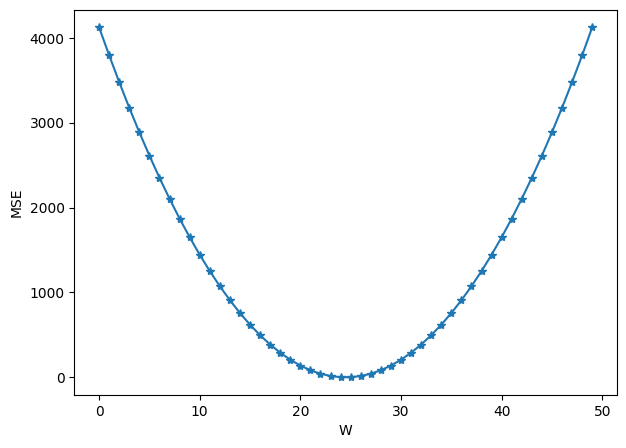

In [27]:
import matplotlib.pyplot as plt
plt. figure(figsize=(7,5))
plt.plot(mse_list, marker='*')
plt.ylabel('MSE')
plt.xlabel('W')
plt.show()

## 경사하강법

### 사용할 데이터셋 생성
#### 문제 생성(공부한 시간)

In [8]:
import numpy as np
#0.0 ~ 1.0 사이의 균등분포를 가진 100개 데이터가 랜덤하게 추출
x = np.random.uniform(low=0.0, high=1.0, size=100)
print(x.shape)
print(x)

(100,)
[0.51112219 0.0334511  0.43156388 0.14129517 0.17822623 0.31464507
 0.93706543 0.80445978 0.00610973 0.05391878 0.95171291 0.05693247
 0.21680819 0.64290687 0.83750003 0.11567591 0.11642114 0.05083476
 0.89178761 0.94892517 0.13335594 0.84709426 0.92269516 0.80864244
 0.4239006  0.32451374 0.34811856 0.59456441 0.21428331 0.77050323
 0.10328065 0.47935962 0.74419065 0.12417787 0.72310768 0.95048677
 0.69984551 0.87898603 0.35031704 0.32461748 0.90057143 0.02969889
 0.2734943  0.19053753 0.66422335 0.0122893  0.73246828 0.3509023
 0.83826866 0.87208243 0.53869905 0.8934343  0.44198391 0.96294052
 0.74615957 0.32639478 0.49583189 0.59626457 0.72754776 0.80851873
 0.58266648 0.94229687 0.22533596 0.54667405 0.87106142 0.94682282
 0.02015241 0.05183034 0.61190686 0.46252453 0.55746277 0.23207829
 0.92661491 0.7309599  0.86414167 0.49225061 0.39119152 0.42909093
 0.12531956 0.71727112 0.3903253  0.40223539 0.09846948 0.81107677
 0.76360469 0.92370519 0.50577719 0.23738278 0.53672615 

#### 정답 생성(성적)

In [9]:
y = 10*x+5
print(y.shape)
print(y)

(100,)
[10.11122189  5.33451095  9.31563876  6.41295167  6.78226227  8.14645072
 14.37065427 13.04459785  5.06109729  5.53918778 14.51712914  5.56932474
  7.16808194 11.42906871 13.37500032  6.15675914  6.16421144  5.50834762
 13.91787609 14.48925168  6.33355938 13.47094256 14.22695165 13.08642445
  9.23900604  8.24513735  8.48118555 10.9456441   7.14283314 12.70503227
  6.0328065   9.7935962  12.44190654  6.24177868 12.23107676 14.50486773
 11.99845511 13.78986032  8.50317041  8.24617483 14.00571429  5.29698891
  7.73494301  6.90537526 11.64223355  5.12289301 12.3246828   8.50902303
 13.38268657 13.72082427 10.38699046 13.93434297  9.41983912 14.62940523
 12.46159565  8.26394779  9.95831894 10.96264569 12.27547758 13.08518728
 10.82666482 14.42296866  7.25335958 10.46674046 13.7106142  14.46822821
  5.20152409  5.51830343 11.11906861  9.62524525 10.57462774  7.3207829
 14.26614913 12.30959905 13.6414167   9.92250615  8.91191522  9.2909093
  6.25319561 12.17271118  8.90325303  9.022353

### 경사하강법을 이용한 학습

In [10]:
num_epoch = 500 #epoch 경사하강법 돌리는 최대 반복 횟수
learning_rate = 1.0   #학습률
#초기 가중치와 절편을 셋팅
w= np.random.uniform(low=0.0, high=1.0)
b= np.random.uniform(low=0.0, high=1.0)

print("초기 가중치 :", w)
print("초기 절편 :", b)

초기 가중치 : 0.48772895915985004
초기 절편 : 0.5517044837071239


In [11]:
for epoch in range(num_epoch):
    #MSE 구하기
    pre_y = w*x+b
    mse = ((y-pre_y)**2).mean()
    print("MSE :", mse)
    
    #MSE가 일정 수준이하로 떨어지면 반복을 멈춤
    if mse < 0.001:
        break
        
    #경사하강법을 이용해 w,b 업데이트
    w = w - learning_rate * ((pre_y-y)*x).mean()
    b = b - learning_rate * ((pre_y-y)*1).mean()
    
    #중간결과 출력
    print('epoch :', (epoch+1), " w :", w, ' b :',  b)

MSE : 94.62214466388902
epoch : 1  w : 6.0941930212155535  b : 9.834347413711331
MSE : 9.544124199670684
epoch : 2  w : 5.011055835515608  b : 6.985017855911993
MSE : 2.628682341244394
epoch : 3  w : 5.7569819636472666  b : 7.535492230527861
MSE : 1.825918288149681
epoch : 4  w : 5.9607809449714315  b : 7.156396004939813
MSE : 1.5352150998143494
epoch : 5  w : 6.285563038200747  b : 7.052820836186583
MSE : 1.3164295007142963
epoch : 6  w : 6.548749055120091  b : 6.88775936288733
MSE : 1.1308573731689064
epoch : 7  w : 6.8032528270186425  b : 6.754002383638488
MSE : 0.971602902686388
epoch : 8  w : 7.036218512005694  b : 6.62465791414481
MSE : 0.8347879414904944
epoch : 9  w : 7.25297914416884  b : 6.50625957878775
MSE : 0.7172393500757677
epoch : 10  w : 7.453671441879584  b : 6.396097011195502
MSE : 0.6162431458164701
epoch : 11  w : 7.63976150408306  b : 6.294100728055106
MSE : 0.5294684666315982
epoch : 12  w : 7.812235073186585  b : 6.199525625320092
MSE : 0.45491273912847996
epoch

### 입력특성이 2개인 경우 구현
#### 문제 생성(x1:공부한 시간, x2:잠자는 시간)

In [12]:
x1 = np.random.uniform(low=0.0, high=1.0, size=100)
x2 = np.random.uniform(low=0.0, high=1.0, size=100)
y0 = (10*x1)+(5*x2)+3

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b0 = np.random.uniform(low=0.0, high=1.0)

print("초기 가중치(w1) :", w1)
print("초기 가중치(w2) :", w2)
print("초기 절편 :", b0)

초기 가중치(w1) : 0.09176627440957852
초기 가중치(w2) : 0.786243729020346
초기 절편 : 0.6232913861622068


In [13]:
num_epoch = 500
learning_rate = 0.01

for epoch in range(num_epoch):
    pre_y0 = (w1*x1)+(w2+x2)+b0
    mse0 = ((y-pre_y0)**2).mean()
    print("MSE :", mse0)

    if mse0 < 0.1:
        break

    w1 = w1 - learning_rate * ((pre_y0-y0)*x1).mean()
    w2 = w2 - learning_rate * ((pre_y0-y0)*x2).mean()
    b0 = b0 - learning_rate * ((pre_y0-y0)*1).mean()
    
    print('epoch :', (epoch+1), " w1 :", w1, "w2 :", w2, 'b :',  b0)
    print('-'*83)

MSE : 75.15496104754682
epoch : 1  w1 : 0.14363615179996952 w2 : 0.8325131141099773 b : 0.7099736138769016
-----------------------------------------------------------------------------------
MSE : 72.5969693942845
epoch : 2  w1 : 0.19465612399444351 w2 : 0.877966896985482 b : 0.7950641321495614
-----------------------------------------------------------------------------------
MSE : 70.13434927017234
epoch : 3  w1 : 0.24484127379632753 w2 : 0.9226196254950791 b : 0.878591310221418
-----------------------------------------------------------------------------------
MSE : 67.76364441343436
epoch : 4  w1 : 0.2942064153527165 w2 : 0.9664855883011114 b : 0.9605830119218306
-----------------------------------------------------------------------------------
MSE : 65.48152218500424
epoch : 5  w1 : 0.34276609894058413 w2 : 1.009578819497488 b : 1.041066604672274
-----------------------------------------------------------------------------------
MSE : 63.28476917511238
epoch : 6  w1 : 0.390534615

## SGDRegressor (경사하강법으로 구현된 모델)

In [28]:
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor()

In [29]:
sgd_model.fit(data[['공부시간']], data['성적점수'])   
#대괄호 두번은 2차원으로 나오라고 치는 것 일반적으로 모델은 특성이 여러개 들어가니까

SGDRegressor()

In [30]:
print("가중치 :", sgd_model.coef_)
print("절편 :", sgd_model.intercept_)

가중치 : [9.85662451]
절편 : [1.03520409]


In [31]:
sgd_model.predict([[7],[5]])

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([70.03157567, 50.31832665])

- max_iter -> 최대 미분 수
- eta0 -> learning rate 학습률 (너무커도 안되고 너무 작어도 안됨)

In [32]:
sgd_model = SGDRegressor(eta0=0.1,   #학습률
                         max_iter=6000,   #반복횟수(가중치 업데이트 횟수)
                         epsilon=0.001,   #최소 오차 기준값
                         n_iter_no_change=100,   #업데이트시 오차가 변경되지 않는걸 허용하는 횟수
                         verbose=1)   #과정을 살펴볼 수 있게 해줌

In [33]:
sgd_model.fit(data[['공부시간']], data['성적점수'])   

-- Epoch 1
Norm: 33.60, NNZs: 1, Bias: 77.902602, T: 4, Avg. loss: 178824.598328
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 108.40, NNZs: 1, Bias: 52.722243, T: 8, Avg. loss: 12470.454079
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 125.43, NNZs: 1, Bias: 252.441213, T: 12, Avg. loss: 3078624.310566
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 304.49, NNZs: 1, Bias: 243.254777, T: 16, Avg. loss: 111047.725540
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 406.52, NNZs: 1, Bias: 531.665745, T: 20, Avg. loss: 10374897.849072
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 708.50, NNZs: 1, Bias: 540.115224, T: 24, Avg. loss: 869888.775770
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 915.14, NNZs: 1, Bias: 1005.887170, T: 28, Avg. loss: 36944378.797500
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1373.68, NNZs: 1, Bias: 1050.914866, T: 32, Avg. loss: 4245551.797353
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1680.74, NNZs: 1, Bias: 1743

SGDRegressor(epsilon=0.001, eta0=0.1, max_iter=6000, n_iter_no_change=100,
             verbose=1)

In [34]:
print("가중치 :", sgd_model.coef_)
print("절편 :", sgd_model.intercept_)

가중치 : [-862.59469692]
절편 : [6373.32395889]


# (실습2) LinearRegression으로 손글씨 예측 - 분류

## 1. 문제정의(목표설정)
- 손글씨를 분류하는 모델을 만들어보자.
- 예측의 불확실성을 확인해보자.
- 이미지 데이터에 형태를 이해해보자.
- 다양한 분류평가지표를 이해해보자.

## 2. 데이터 수집

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("./data/digit_train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data.shape

(42000, 785)

- pixel: 하나의 픽셀 안에 RGB 데이터를 담고 있음 
- 28x28 size의 이미지를 한줄로 세워서 1차원 데이터로 만듬

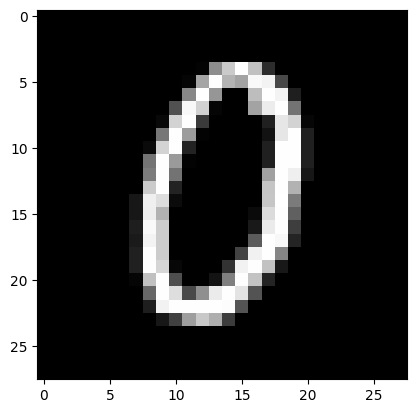

In [39]:
# 이미지 확인
img = data.iloc[5,1:]
img_reshape=img.values.reshape(28,28)
#.values시리즈나 판다스에서 넘파이로 바꾸는 법)
#.reshape모양 바꾸는 법

plt.imshow(img_reshape, cmap='gray')  #흑백 데이터 

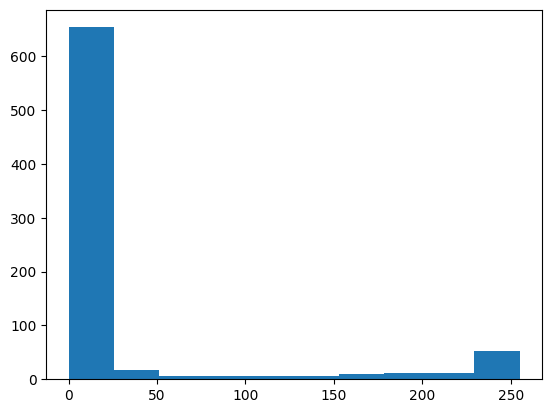

In [40]:
# 데이터 분포 확인
plt.hist(img)
plt.show()

In [41]:
# 손글씨 정답의 종류
data["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [44]:
# 훈련용 데이터와 검증용 데이터 분리
X=data.iloc[:,1:]
y=data.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=728,test_size=0.3)

## 3. 모델링
- KNN
- Decision Tree
- Logistic Regression
- SVM
- SGD

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [45]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

logi_model=LogisticRegression()
logi_model.fit(X_train,y_train)

svc_model=LinearSVC()
svc_model.fit(X_train,y_train)

sgd_model=SGDClassifier()
sgd_model.fit(X_train,y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SGDClassifier()

In [47]:
knn_model.score(X_test,y_test)

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9671428571428572

In [48]:
tree_model.score(X_test,y_test)

0.8474603174603175

In [49]:
logi_model.score(X_test,y_test)

0.9137301587301587

In [50]:
svc_model.score(X_test,y_test)  

0.8494444444444444

In [51]:
sgd_model.score(X_test,y_test)

0.8833333333333333

### 교차검증 활용 점수 확인
- 반드시 평균을 내서 점수를 확인해야함

In [46]:
from sklearn.model_selection import cross_val_score 

X1 = data.iloc[:,1:]
y1 = data.iloc[:,0]

In [52]:
np.mean(cross_val_score(knn_model, X1, y1, cv=3))

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimina

0.9642142857142857

In [53]:
np.mean(cross_val_score(tree_model, X1, y1, cv=3))

0.8442619047619048

In [54]:
np.mean(cross_val_score(logi_model, X1, y1, cv=3))

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

0.9128095238095238

In [55]:
np.mean(cross_val_score(svc_model, X1, y1, cv=3))

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8559285714285713

In [56]:
np.mean(cross_val_score(sgd_model, X1, y1, cv=3))

0.8759285714285715

### 스케일링 추가

In [57]:
from sklearn.preprocessing import MinMaxScaler
mM_scaler = MinMaxScaler()

In [58]:
X2 = mM_scaler.fit(X1).transform(X1)

In [59]:
np.mean(cross_val_score(knn_model, X2, y1, cv=3))

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimina

0.9641904761904762

In [60]:
np.mean(cross_val_score(tree_model, X2, y1, cv=3))  #Decision Tree 는 스케일링 영향 안받음

0.8453095238095237

In [61]:
np.mean(cross_val_score(logi_model, X2, y1, cv=3))  #logi 역시 스케일링 영향 많이 안받음

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

0.9162857142857144

In [62]:
np.mean(cross_val_score(svc_model, X2, y1, cv=3))   # SVC 스케일링 영향 많이 받음 반드시 해주는 게 좋음

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9079047619047619

In [63]:
np.mean(cross_val_score(sgd_model, X2, y1, cv=3))   # 경사하강법은 스케일링에 약간의 영향을 받음 (단, 스케일링 하면 속도가 빨라짐)

0.9038095238095237

### 예측의 불확실성 확인
- 분류모델들은 예측 결과를 정하기전에 항상 확률을 계산한다.
- 분류모델이 예측한 값이 같더라도 확신의 정도(불확실성)가 전부 다르다.

In [64]:
logi_model4= LogisticRegression()
logi_model4.fit(X_train,y_train)
pre = logi_model4.predict(X_test)
pre

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([7, 8, 0, ..., 1, 8, 6])

In [65]:
pre_proba = logi_model4.predict_proba(X_test)
pre_proba[0]
#predict_proba : 확률에 대한 예측을 알아보는 함수 Q.
#부동소수점 표기법(실수가 너무 크니까 조금 압축해서 표현하는 방법 Q.
                # e-n이면 소수점을 왼쪽으로 (n번) 이동시켜라 / e+n이면 소수점을 오른쪽으로 n번 이동시켜라
# logi 모델은 클래스별로 확률을 뽑음 그래서 숫자가 10개임

array([3.11562560e-04, 6.24925272e-16, 1.44810538e-08, 3.34690943e-05,
       2.29330978e-06, 3.77048721e-02, 2.90276125e-08, 6.88094715e-01,
       3.56029609e-04, 2.73497015e-01])

## 4. 모델 평가하기 (145p)
- 정확도(Accuracy): 전체 중에 정확히 맞춘 비율 (TP+TN)/(TP+TN+FP+FN)   
- (정확도로만 보면 민감도와 특이도가 0인 경우도 정확도가 높게 나오는 경우가 있어서 정확하지 않음)
- 오차행렬(Confusion Matrix):
    - 민감도(재현율 Recall) : 참인 것 중에 맞춘 참의 비율 TP/(TP+FN) 
    - 정밀도(Precision): 예측 양성 중에서 실제 양성 비율 TP/(TP+FP)
    - 특이도 : 거짓 중에 맞춘 거짓의 비율 TN/(TN+FP)
    
- F1 socre : 정밀도와 재현율의 조화평균( F = 2precision*recall / (precision+recall) )\

    - 낮은 재현율 보다 높은 정밀도를 선호하는 경우(깐깐함)
        - 어린아이에게 안전한 동영상(양성)을 걸러내는 분류기를 훈련시킬 경우좋은 동영상이 많이 제외되더라도(낮은 재현율) 안전한 것들만 노출시키는(높은 정밀도) 분류기가 더 좋다.
    - 낮은 정밀도 보다 높은 재현율을 선호하는 경우(털털한): 
        - 감시 카메라로 좀도둑(양성)을 잡아내는 분류기를 훈련시키는 경우 경비원이 잘못된 호출을 종종 받지만(낮은 정밀도) 거의 모든 좀도둑을 잡는(높은 재현율)분류기가 더 좋다.
- ROC curve : 이진 분류일 때 활용하는 방법 (위양성률 != 특이도)  Q.
    - x축:위음성, y축:재현율로 그려지는데 그래프가 왼쪽 상단으로 올라면 올라갈수록 좋은 그래프이다.
    - FPR = FP/FP+TN (실제 거짓인 것 중에서 위양성) (특이도 + ROC = 1)
- ROC AUC : 위에 커브 그래프의 아래 밑 면적을 계산해서 나타내주는 것

### 오차행렬

In [66]:
num = [1, 2, 3, 4, 5, 6]
ans = ['음치', '음치', '음치', '음치', '가수', '가수']
pred = ['음치', '음치', '가수', '가수', '가수', '가수']
#음치가 양성
#진음성 : 2   #위양성 : 0
#위음성 : 2   #진양성 : 2
#정확도 : 66%
#재현율 : 50%
#정밀도 : 100%

In [67]:
from sklearn.metrics import confusion_matrix #오차행렬 
from sklearn.metrics import classification_report #분류평가지표를 리포팅
#confusion_matrix(실제값, 예측값) - 짝표
confusion_matrix(y_test, pre)

array([[1160,    1,    2,    4,    0,    7,   14,    4,    2,    1],
       [   0, 1374,    1,    5,    1,    3,    2,    2,   19,    1],
       [   9,   23, 1140,   29,   12,    4,   12,    9,   35,   12],
       [   4,    2,   38, 1194,    0,   34,    2,   12,   32,   16],
       [   4,    3,   11,    2, 1091,    2,   10,    5,   13,   50],
       [  19,    3,    5,   43,    8,  939,   26,   10,   37,   16],
       [  12,    2,   11,    1,   12,   16, 1198,    0,    6,    1],
       [   3,    2,   18,    7,   12,    1,    3, 1275,    4,   47],
       [  19,   28,   11,   31,   12,   36,    4,    9, 1074,   23],
       [  10,    3,    2,   15,   36,    8,    0,   49,   12, 1068]])

In [68]:
# classification_report(실제값, 예측값)
print(classification_report(y_test, pre))   
#정확도, 정밀도, 재현율, F1socre 한번에 볼 수 있음
#support 데이터 개수를 의미

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1195
           1       0.95      0.98      0.96      1408
           2       0.92      0.89      0.90      1285
           3       0.90      0.90      0.90      1334
           4       0.92      0.92      0.92      1191
           5       0.89      0.85      0.87      1106
           6       0.94      0.95      0.95      1259
           7       0.93      0.93      0.93      1372
           8       0.87      0.86      0.87      1247
           9       0.86      0.89      0.88      1203

    accuracy                           0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600

